# <font color = 'orange'> Diabetes Prediction Using Decision Tree

---

## <font color='blue'> 1. Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix

import pickle

---

## <font color='blue'> 2. Load Dataset, EDA and Feature Engineering

In [2]:
data = pd.read_csv('..\dataset\diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <font color = '#AA00FF'> Observation :
* Shape = (768,9)
* All are in correct datatype.
* There are no null values in features.
* 8 Independent Features.
* 1 Dependent Feature ['Outcome'] - To be predicted.

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### <font color = '#AA00FF'> Observation :
We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.  
      
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.  

In [5]:
# here few misconception is there like BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column

data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

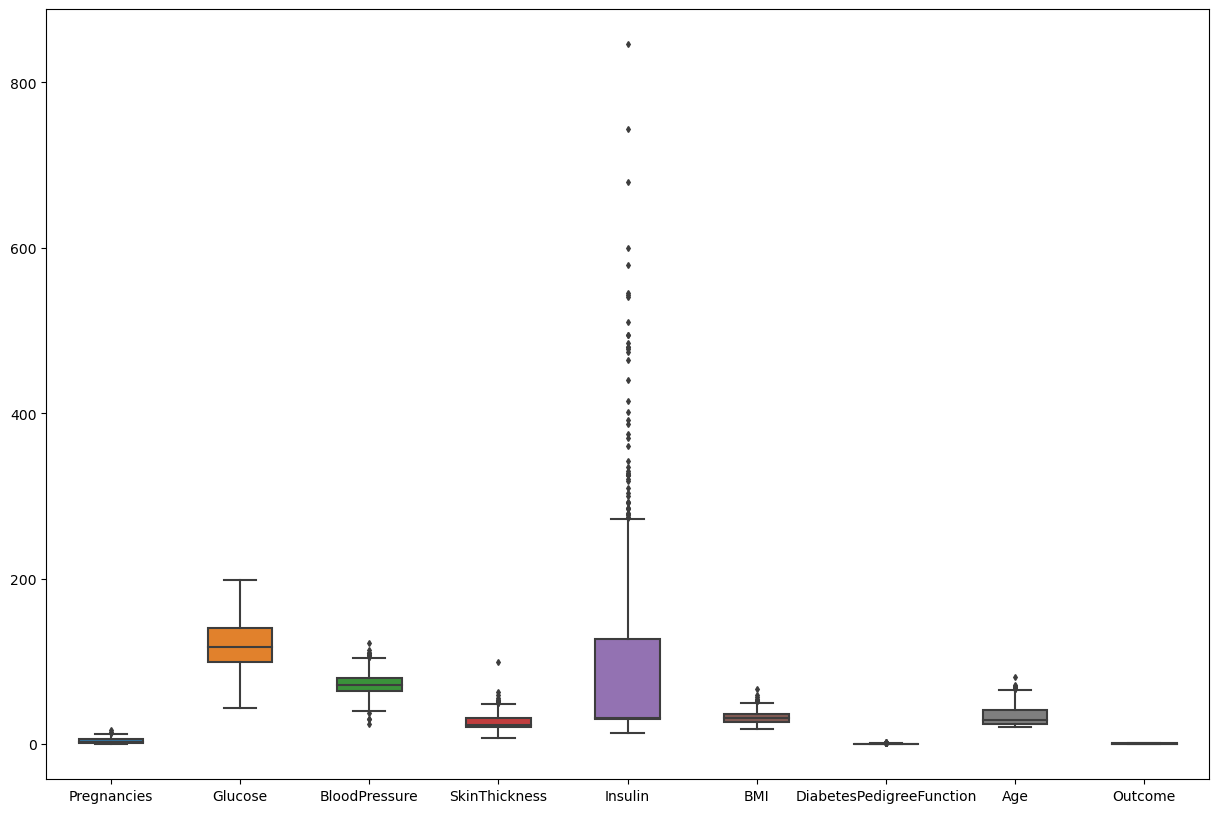

In [7]:
# let's check the outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,30.5,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.0,43.1,2.288,33,1


---

## <font color='blue'> 3. Segergate independent and dependent features

In [9]:
# x will be my independent features
x = data.iloc[:,:-1]

# y will be my dependent features
y = data.iloc[:,-1]

---

## <font color='blue'> 4. Train Test Split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

---

## <font color='blue'> 5. Standardization
    We also save 'scaler' pickle file into model folder

In [11]:
def scaler_standard(x_train,x_test):
    # scaling data
    scaler = StandardScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # saving scaler as pickle file
    file = open('..\model\StandardScaler.pkl','wb')
    pickle.dump(scaler,file)
    file.close()
    
    return x_train_scaled, x_test_scaled

In [12]:
x_train_scaled, x_test_scaled = scaler_standard(x_train,x_test)

---

## <font color='blue'> 6. Decision Tree Model Training with Hyperparameter Tuning

In [13]:
import warnings 
warnings.filterwarnings('ignore')

In [14]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']    
}

In [15]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier()

clf = GridSearchCV(classifier,param_grid = parameter, cv = 3, scoring = 'accuracy', verbose = 3)
clf.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.703 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=best;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.698 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=auto, splitter=random;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.708 total time=   0.0s
[CV 2/3] END criterion=gini, max_depth=1, max_features=sqrt, splitter=best;, score=0.635 total time=   0.0s
[CV 3/3] END criterion=gini, max_depth=1, max_features=sqrt, splitte

[CV 2/3] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.677 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=sqrt, splitter=random;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=best;, score=0.745 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=best;, score=0.724 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=best;, score=0.688 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.646 total time=   0.0s
[CV 2/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.615 total time=   0.0s
[CV 3/3] END criterion=entropy, max_depth=2, max_features=log2, splitter=random;, score=0.641 total time=   0.0s
[CV 1/3] END criterion=entropy, max_depth=3, max_features=auto, splitter=best;, score=0.719 total time

[CV 2/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=nan total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=nan total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=3, max_features=log2, splitter=random;, score=nan total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 2/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 3/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=best;, score=nan total time=   0.0s
[CV 1/3] END criterion=log_loss, max_depth=4, max_features=auto, splitter=random;, score=nan total time=   0.0s
[C

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=3)

In [16]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

#### <font color = '#AA00FF'> Observation :
Now, we take that parameters and create decision tree  

In [17]:
classifier = DecisionTreeClassifier(criterion = 'entropy',max_depth = 5, max_features = 'log2', splitter = 'best')

classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='log2')

---

## <font color='blue'> 7. Prediction

In [18]:
y_pred = classifier.predict(x_test_scaled)

---

## <font color='blue'> 8. Performance Metrics

In [19]:
conf_mat = confusion_matrix(y_test,y_pred)

print(conf_mat)

[[113  17]
 [ 29  33]]


In [20]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [21]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7604166666666666

In [22]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8692307692307693

In [23]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.795774647887324

In [24]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8308823529411764

---

## Support machine vector with hyperparameter tuning

In [25]:
parameters = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear','rbf','polynomial']
              }

In [26]:
svc_classifier = SVC()

grid = GridSearchCV(svc_classifier, param_grid = parameters, refit = True, cv = 3, verbose = 3, scoring = 'accuracy')

grid.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV 1/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.766 total time=   0.0s
[CV 2/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 3/3] END .....C=0.1, gamma=1, kernel=linear;, score=0.745 total time=   0.0s
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.641 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.766 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.776 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=0.1, kernel=linear

[CV 3/3] END ....C=10, gamma=0.1, kernel=linear;, score=0.740 total time=   0.0s
[CV 1/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 2/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.734 total time=   0.0s
[CV 3/3] END .......C=10, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 1/3] END ..C=10, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 2/3] END ..C=10, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 3/3] END ..C=10, gamma=0.1, kernel=polynomial;, score=nan total time=   0.0s
[CV 1/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.771 total time=   0.0s
[CV 2/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.771 total time=   0.0s
[CV 3/3] END ...C=10, gamma=0.01, kernel=linear;, score=0.740 total time=   0.0s
[CV 1/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.755 total time=   0.0s
[CV 2/3] END ......C=10, gamma=0.01, kernel=rbf;, score=0.755 total time=   0.0s
[CV 3/3] END ......C=10, gam

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'polynomial']},
             scoring='accuracy', verbose=3)

In [27]:
best_params = grid.best_params_

best_params

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [28]:
# model training

svc_classifier = SVC(C = best_params['C'], gamma = best_params['gamma'], kernel = best_params['kernel'])
svc_classifier.fit(x_train_scaled,y_train)

SVC(C=10, gamma=0.001)

In [29]:
# Prediction
y_pred = svc_classifier.predict(x_test_scaled)

In [30]:
conf_mat = confusion_matrix(y_test,y_pred)

print(conf_mat)

[[117  13]
 [ 29  33]]


In [31]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [32]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.78125

In [33]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [34]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8013698630136986

In [35]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8478260869565217

---

## Naive Bayes with hyperparameter tuning

In [36]:
naive_classifier = BernoulliNB()
naive_classifier.fit(x_train_scaled,y_train)
y_pred = naive_classifier.predict(x_test_scaled)

In [37]:
conf_mat = confusion_matrix(y_test,y_pred)

print(conf_mat)

[[107  23]
 [ 30  32]]


In [38]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [39]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7239583333333334

In [40]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.823076923076923

In [41]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.781021897810219

In [42]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8014981273408239

---

## <font color='blue'> 9. Pickling File

In [43]:
file = open('../model/ModelForPrediction.pkl','wb')
pickle.dump(classifier,file)
file.close()

---